#Reinforcement Learning - Assignment 1: Bandits and Exploration/Exploitation using OpenAI Gym

#Rhichard Koh

### Assignment 1: Bandits and Exploration/Exploitation using OpenAI Gym

# Objectives
Students will:
1. Implement a multi-armed bandit algorithm using OpenAI Gym.
2. Understand and analyze the impact of the epsilon parameter on exploration and exploitation.
3. Use OpenAI Gym's environments to simulate and visualize reinforcement learning tasks.

# Section 0: Setup and Preliminaries
### Install OpenAI Gym
Command to run in your terminal if not already installed:
```bash
pip install gym
pip install numpy matplotlib
```


In [ ]:
!pip install gym
!pip install numpy matplotlib

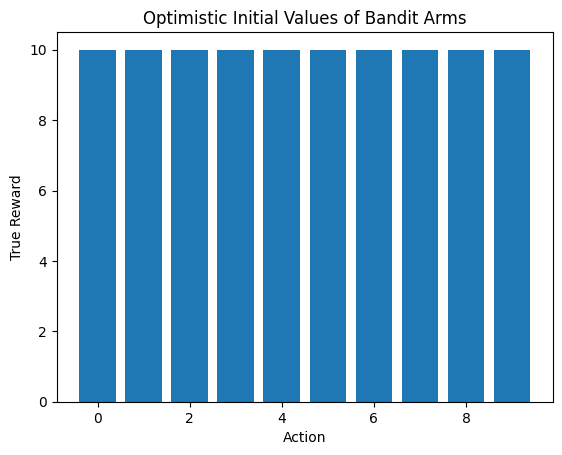

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Define a simple bandit environment
class BanditEnv(gym.Env):
    def __init__(self, k=10):
        super().__init__()
        self.k = k
        self.q_values = np.full(k, 10.0)  # Optimistic initial values
        self.reset()

    def reset(self):
        self.q_values = np.full(self.k, 10.0)  # Reinitialize with optimistic values
        self.last_action = None
        return 0  # Dummy state (no actual state needed)

    def step(self, action):
        reward = np.random.normal(self.q_values[action], 1)
        self.last_action = action
        return 0, reward, False, {}  # Dummy state, reward, done, info

# Create a new instance of BanditEnv with 10 arms
env = BanditEnv(k=10)

# Plot the true rewards for visualization
plt.bar(range(env.k), env.q_values)
plt.xlabel('Action')
plt.ylabel('True Reward')
plt.title('Optimistic Initial Values of Bandit Arms')
plt.show()

### Exercise
1. Play with different value(s) for initialization of `q_values`.
2. Plot the updated `q_values` and observe how different constants impact exploration.


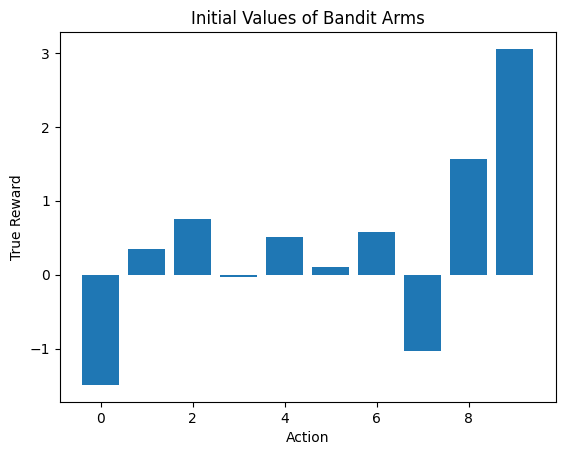

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Define a simple bandit environment
class BanditEnv(gym.Env):
    def __init__(self, k=10):
        super().__init__()
        self.k = k
        self.q_values = np.random.normal(0,1,k) # Initial values from a normal distribution
        self.reset()

    def reset(self):
        self.q_values = np.random.normal(0,1,self.k) # Initial values from a normal distribution
        self.last_action = None
        return 0  # Dummy state (no actual state needed)

    def step(self, action):
        reward = np.random.normal(self.q_values[action], 1)
        self.last_action = action
        return 0, reward, False, {}  # Dummy state, reward, done, info

# Create a new instance of BanditEnv with 10 arms
env = BanditEnv(k=10)

# Plot the true rewards for visualization
plt.bar(range(env.k), env.q_values)
plt.xlabel('Action')
plt.ylabel('True Reward')
plt.title('Initial Values of Bandit Arms') # Updated title
plt.show()


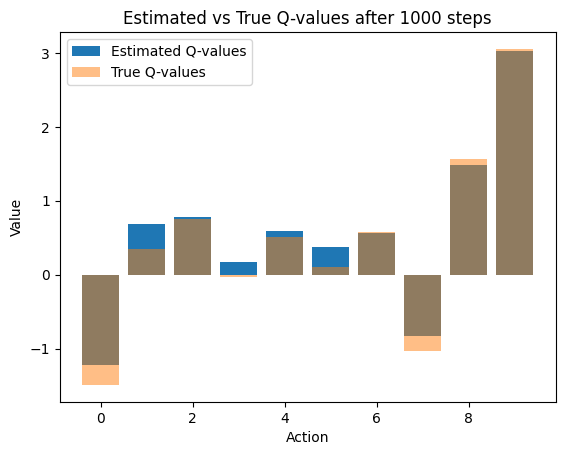

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 1000
epsilon = 0.1
q_estimates = np.zeros(env.k)
N = np.zeros(env.k)

for step in range(num_steps):
    if np.random.rand() < epsilon:
        action = np.random.randint(env.k)
    else:
        action = np.argmax(q_estimates)

    _, reward, _, _ = env.step(action)

    N[action] += 1
    q_estimates[action] += (1/N[action]) * (reward - q_estimates[action])


# Plot the updated q_values
plt.bar(range(env.k), q_estimates, label='Estimated Q-values')
plt.bar(range(env.k), env.q_values, alpha=0.5, label='True Q-values') #Plot true q_values for comparison

plt.xlabel('Action')
plt.ylabel('Value')
plt.title('Estimated vs True Q-values after {} steps'.format(num_steps))
plt.legend()
plt.show()


### Answer the following questions in Reflection:
- How do different optimistic initial values affect the agent's exploration behavior?
- Do optimistic initial values lead to faster learning in some scenarios?

Different optimistic initial values directly impact an agent’s exploration behavior by influencing how long it continues to explore before settling on a strategy. Higher optimistic values make all actions appear more rewarding initially, leading to increased exploration as the agent tests multiple options to verify their actual rewards. Conversely, lower optimistic values result in less exploration and faster convergence, but they also increase the risk of prematurely committing to a suboptimal choice. If the optimism is too high, the agent may waste time exploring unnecessarily, while too low values can limit discovery of better actions. Over time, as the agent updates its estimates with real rewards, the influence of initial optimism diminishes, making it primarily beneficial in early learning stages.

Yes, optimistic initial values can lead to faster learning, especially in scenarios with sparse rewards. The initial burst of exploration helps the agent discover good actions more quickly.
If the reward distribution has high variance or there are suboptimal actions with low rewards, optimistic initialization is better than initializing Q values to zero because if it was zero and then the algorithm gets a negative reward, it might take longer to recover from it.


# Section 1: Implementing a Greedy Agent

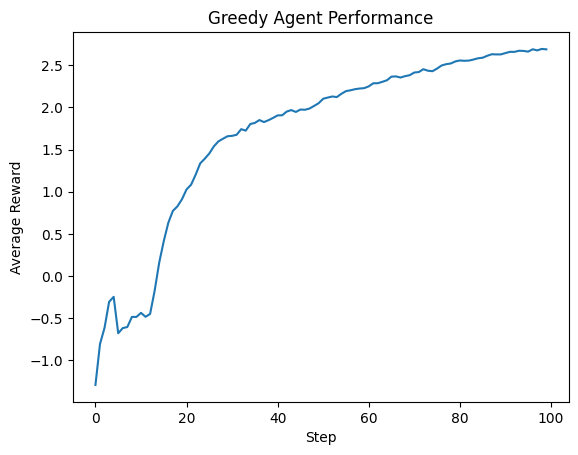

In [ ]:
class GreedyAgent:
    def __init__(self, k):
        self.k = k
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)

    def select_action(self):
        """Choose the action with the highest estimated reward."""
        return np.argmax(self.q_estimates)

    def update_estimates(self, action, reward):
        """Update action-value estimates using incremental formula."""
        self.action_counts[action] += 1
        self.q_estimates[action] += (1 / self.action_counts[action]) * (reward - self.q_estimates[action])

# Test the greedy agent
agent = GreedyAgent(k=env.k)

# Perform 100 steps with the greedy agent
rewards = []
for _ in range(100):
    action = agent.select_action()
    _, reward, _, _ = env.step(action)
    agent.update_estimates(action, reward)
    rewards.append(reward)

# Plot rewards over time
plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1))
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Greedy Agent Performance')
plt.show()

### Exercise
1. Modify the `select_action` method with a different strategy (eg. select actions proportional to their estimated rewards)
2. Compare the performance of this strategy with the standard `argmax` approach.

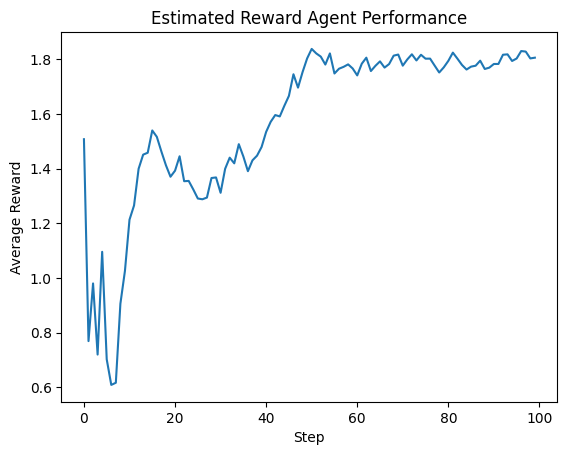

In [ ]:
import numpy as np

class EstimatedReward:
    def __init__(self, k):
        self.k = k
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)

    def select_action(self):
        """Choose the action with the highest estimated reward."""
        # Modified selection strategy: select actions proportional to their estimated rewards
        exp_rewards = np.exp(self.q_estimates)
        probabilities = exp_rewards / np.sum(exp_rewards)
        return np.random.choice(self.k, p=probabilities)

    def update_estimates(self, action, reward):
        """Update action-value estimates using incremental formula."""
        self.action_counts[action] += 1
        self.q_estimates[action] += (1 / self.action_counts[action]) * (reward - self.q_estimates[action])

# Test the estimated rewards agent
agent = EstimatedReward(k=env.k)

# Perform 100 steps with the estimated rewards agent
rewards = []
for _ in range(100):
    action = agent.select_action()
    _, reward, _, _ = env.step(action)
    agent.update_estimates(action, reward)
    rewards.append(reward)
# Plot rewards over time
plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1))
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Estimated Reward Agent Performance')
plt.show()

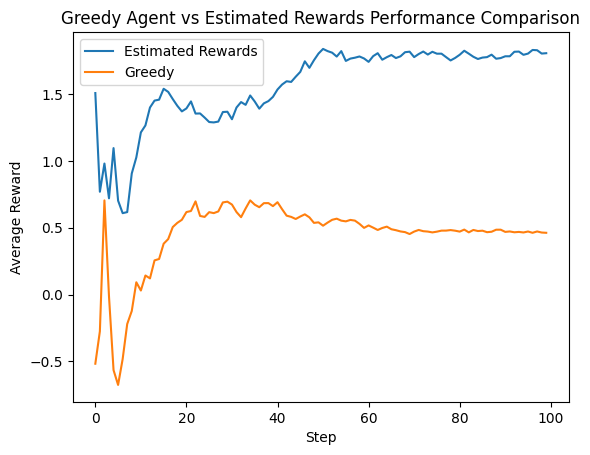

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class GreedyAgentArgmax:
    def __init__(self, k):
        self.k = k
        self.q_estimates = np.zeros(k)
        self.action_counts = np.zeros(k)

    def select_action(self):
        """Choose the action with the highest estimated reward."""
        return np.argmax(self.q_estimates)

    def update_estimates(self, action, reward):
        """Update action-value estimates using incremental formula."""
        self.action_counts[action] += 1
        self.q_estimates[action] += (1 / self.action_counts[action]) * (reward - self.q_estimates[action])


# Test the greedy agent with argmax
agent_argmax = GreedyAgentArgmax(k=env.k)
rewards_argmax = []
for _ in range(100):
    action = agent_argmax.select_action()
    _, reward, _, _ = env.step(action)
    agent_argmax.update_estimates(action, reward)
    rewards_argmax.append(reward)

# Plotting both results for comparison

plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1), label='Estimated Rewards')
plt.plot(np.cumsum(rewards_argmax) / (np.arange(len(rewards_argmax)) + 1), label='Greedy')
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Greedy Agent vs Estimated Rewards Performance Comparison')
plt.legend()
plt.show()


### Reflection
- How would the agent behave if the `select_action` method used a different strategy, such as selecting actions proportional to their estimated rewards?
- What are the limitations of using `argmax` in dynamic environments?

Selecting actions proportional to their estimated rewards introduces a form of stochasticity to the agent's decision-making process.  Instead of always picking the action with the highest estimated value (as argmax does), the agent now chooses actions based on a probability distribution derived from the estimated rewards.  Actions with higher rewards have a greater probability of being selected, but other actions still have a chance, even if their estimated value is lower.  This allows for continued exploration of less-frequently chosen actions, which might be beneficial if the true rewards of actions change over time.  In contrast, a purely greedy argmax agent will quickly converge on a single action and may not discover better options if the optimal action shifts.


The argmax approach, while simple and often effective in stationary environments, suffers from limitations when applied to dynamic environments where the optimal action might change over time.  A purely greedy argmax agent will quickly converge on a single action once it deems it optimal. If the environment's reward structure changes, making another action optimal, the agent will fail to adapt and remain stuck with its initial "best" choice.  This is known as "exploitation bias" and might cause the agent's performance to degrade significantly.  In dynamic settings, a balance of exploration and exploitation is crucial, and methods like those employing probability distributions based on estimated rewards or epsilon-greedy strategies provide a degree of exploration to counteract the limitations of a strictly greedy approach.


# Section 2: Epsilon-Greedy Agent

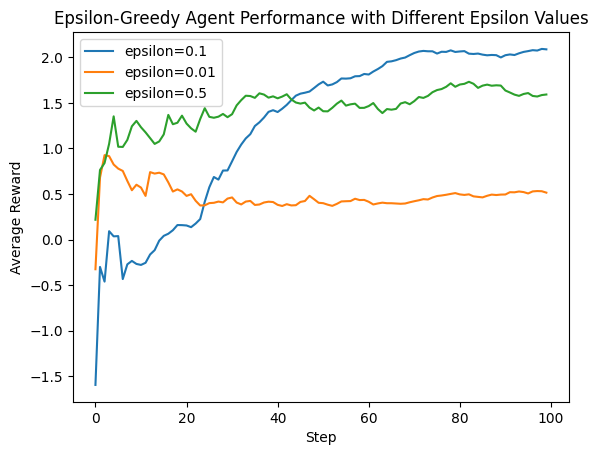

In [ ]:
class EpsilonGreedyAgent(GreedyAgent):
    def __init__(self, k, epsilon):
        super().__init__(k)
        self.epsilon = epsilon

    def select_action(self):
        """Choose an action using epsilon-greedy strategy."""
        if np.random.random() < self.epsilon:
            return np.random.randint(0, self.k)  # Explore
        return super().select_action()  # Exploit

# Test the epsilon-greedy agent with different epsilon values
for epsilon in [0.1, 0.01, 0.5]:
    agent = EpsilonGreedyAgent(k=env.k, epsilon=epsilon)
    rewards = []
    for _ in range(100):
        action = agent.select_action()
        _, reward, _, _ = env.step(action)
        agent.update_estimates(action, reward)
        rewards.append(reward)

    # Plot rewards for the current epsilon value
    plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1), label=f"epsilon={epsilon}")

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Agent Performance with Different Epsilon Values')
plt.legend()
plt.show()

### Exercise
1. Test the agent with `epsilon=0` and `epsilon=1`. Compare and analyze the results.
2. Experiment with different reward distributions (e.g., uniform, exponential) and observe how they affect agent performance.


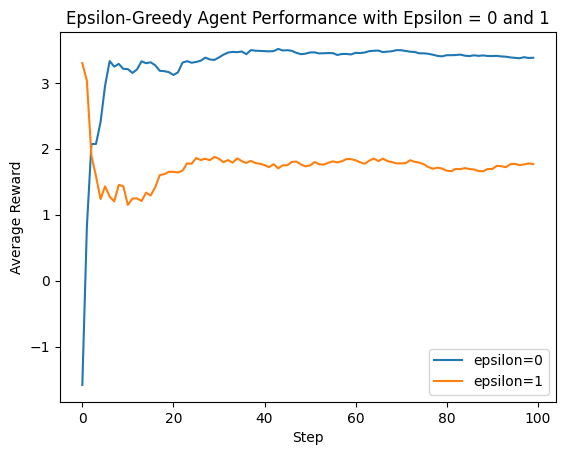

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Test the epsilon-greedy agent with epsilon = 0 and epsilon = 1
epsilon_values = [0, 1]
for epsilon in epsilon_values:
    agent = EpsilonGreedyAgent(k=env.k, epsilon=epsilon)
    rewards = []
    for _ in range(100):
        action = agent.select_action()
        _, reward, _, _ = env.step(action)
        agent.update_estimates(action, reward)
        rewards.append(reward)

    # Plot rewards for the current epsilon value
    plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1), label=f"epsilon={epsilon}")

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Agent Performance with Epsilon = 0 and 1')
plt.legend()
plt.show()

epsilon = 0: The agent will always exploit (choose the action with the highest current estimate).  This will lead to rapid convergence to a single action, which may or may not be optimal. If the initial estimates are poor, the agent will be stuck with a suboptimal action.  The performance will likely be poor if the optimal action changes.

epsilon = 1: The agent will always explore (choose actions randomly). There will be no exploitation. The average reward will fluctuate around the mean reward of all the actions. The agent will never converge to a single action.


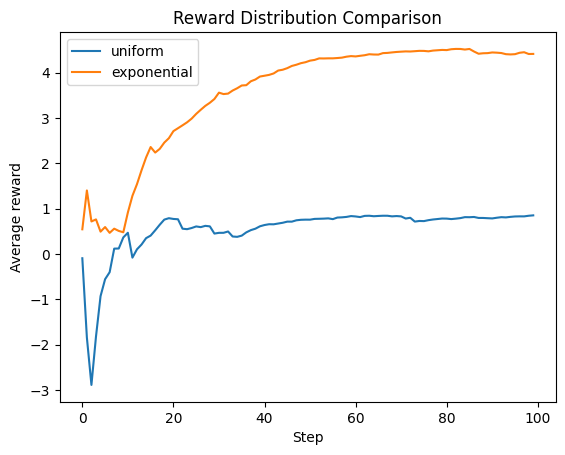

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt


def test_reward_distribution(distribution_name, num_steps=100):
    if distribution_name == "uniform":
        env.q_values = np.random.uniform(-5, 5, env.k) # Uniform distribution
    elif distribution_name == "exponential":
        env.q_values = np.random.exponential(scale=2, size=env.k) # Exponential distribution
    else:
        print("Unknown reward distribution.")
        return

    agent = EpsilonGreedyAgent(k=env.k, epsilon=0.1)
    rewards = []
    for _ in range(num_steps):
      action = agent.select_action()
      _, reward, _, _ = env.step(action)
      agent.update_estimates(action, reward)
      rewards.append(reward)

    plt.plot(np.cumsum(rewards)/(np.arange(len(rewards))+1), label=distribution_name)
    plt.xlabel('Step')
    plt.ylabel('Average reward')
    plt.title('Reward Distribution Comparison')

test_reward_distribution("uniform")
test_reward_distribution("exponential")

plt.legend()
plt.show()

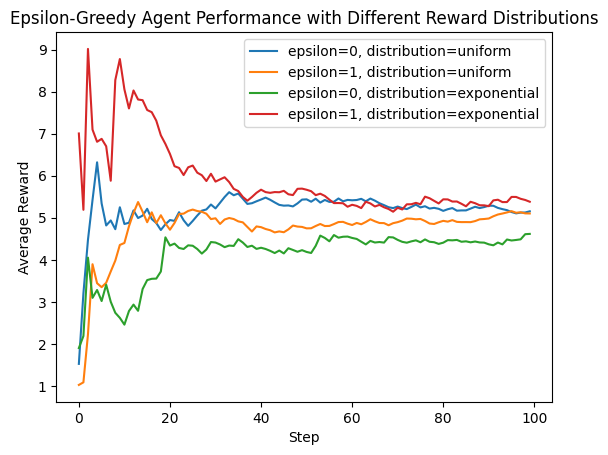

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Experiment with different reward distributions
reward_distributions = {
    "uniform": lambda action: np.random.uniform(0, 10),  # Uniform distribution
    "exponential": lambda action: np.random.exponential(scale=5),  # Exponential distribution
}

for dist_name, reward_dist in reward_distributions.items():
    for epsilon in [0, 1]:
        agent = EpsilonGreedyAgent(k=env.k, epsilon=epsilon)
        rewards = []
        env.reset() #Reset the environment for each distribution

        #Modify the reward function within the loop
        def modified_step(action):
          reward = reward_dist(action)
          agent.update_estimates(action, reward)
          rewards.append(reward)

        #Loop and use modified step function
        for _ in range(100):
            action = agent.select_action()
            modified_step(action)

        # Plot rewards for the current epsilon and distribution
        plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1), label=f"epsilon={epsilon}, distribution={dist_name}")

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Agent Performance with Different Reward Distributions')
plt.legend()
plt.show()


We can observe that once the reward distributions are exponential the exploring agent has the highest average reward when averaging 100 steps. When the reward distribution is uniform the best performing agent is the exploiting agent.

### Reflection
- How does the behavior of the agent change when `epsilon=0` versus `epsilon=1`?
- What assumptions are made about the reward distribution, and how might these assumptions affect the results?


When epsilon=0, the agent behaves purely greedily, always exploiting the action with the highest estimated value.  It will not explore other options.  This can lead to suboptimal performance if the initial estimates are inaccurate or if the optimal action changes over time.  The agent will quickly converge to a single action and may miss out on better opportunities.

When epsilon=1, the agent behaves purely randomly, always exploring.  It never exploits its current knowledge, so it never converges to a single action. The average reward will fluctuate around the mean reward across all actions, indicating a lack of learning or improvement.


The code assumes that rewards follow a normal distribution around the true Q-value of each action, with a standard deviation of 1. This is implemented in the BanditEnv step function as reward = np.random.normal(self.q_values[action], 1). This assumption affects the agent in several ways. First, if the actual reward distribution is not normal (e.g., skewed or has a different variance), the agent’s Q-value estimates may be inaccurate, leading to poor decision-making. Second, the effectiveness of exploration strategies like epsilon-greedy depends on how uncertainty is perceived. If the actual reward variance is higher or lower than expected, the agent may explore too much or too little. Third, the overall performance of the agent depends on how closely the true reward distribution matches the assumed normal distribution—larger differences lead to less reliable Q-values and actions. To reduce these issues, one can use more robust update rules, model the reward distribution more accurately, adjust exploration strategies based on actual reward variance, or use bandit algorithms that do not assume normality, such as Bayesian methods.

# Section 3: Advanced Experimentation with Decaying Epsilon

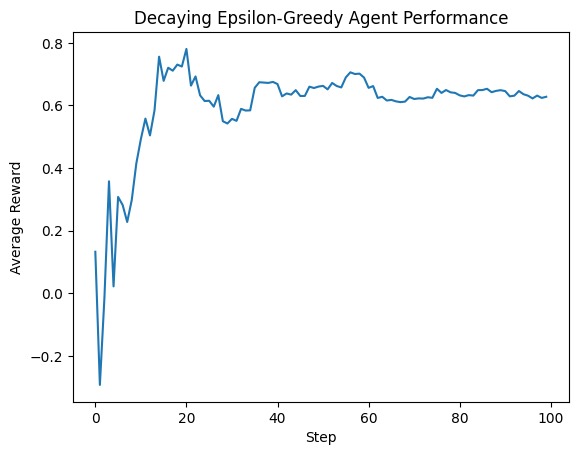

In [ ]:
class DecayingEpsilonGreedyAgent(EpsilonGreedyAgent):
    def __init__(self, k, epsilon, decay_rate):
        super().__init__(k, epsilon)
        self.decay_rate = decay_rate

    def decay_epsilon(self):
        self.epsilon = max(0.01, self.epsilon * self.decay_rate)

# Test the decaying epsilon-greedy agent
agent = DecayingEpsilonGreedyAgent(k=env.k, epsilon=0.1, decay_rate=0.99)
rewards = []

for _ in range(100):
    action = agent.select_action()
    _, reward, _, _ = env.step(action)
    agent.update_estimates(action, reward)
    agent.decay_epsilon()
    rewards.append(reward)

# Plot rewards over time
plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1))
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Decaying Epsilon-Greedy Agent Performance')
plt.show()

### Exercise
1. Experiment with different decay rates (e.g., 0.95, 0.99, 0.999) and compare the results.
2. Set `epsilon` to 0 and 1 for comparison and analyze the implications for exploration and exploitation.
3. Modify the reward generation process to a non-normal distribution (e.g., uniform or exponential) and observe the impact on learning.

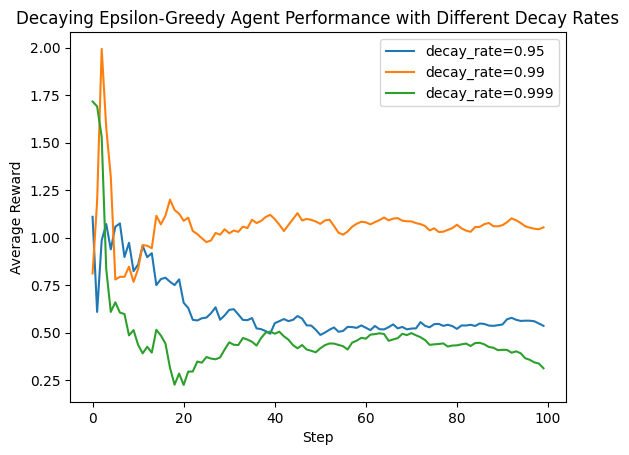

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Test the decaying epsilon-greedy agent with different decay rates
decay_rates = [0.95, 0.99, 0.999]
for decay_rate in decay_rates:
    agent = DecayingEpsilonGreedyAgent(k=env.k, epsilon=0.1, decay_rate=decay_rate)
    rewards = []
    for _ in range(100):
        action = agent.select_action()
        _, reward, _, _ = env.step(action)
        agent.update_estimates(action, reward)
        agent.decay_epsilon()
        rewards.append(reward)

    # Plot rewards for the current decay rate
    plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1), label=f"decay_rate={decay_rate}")

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Decaying Epsilon-Greedy Agent Performance with Different Decay Rates')
plt.legend()
plt.show()

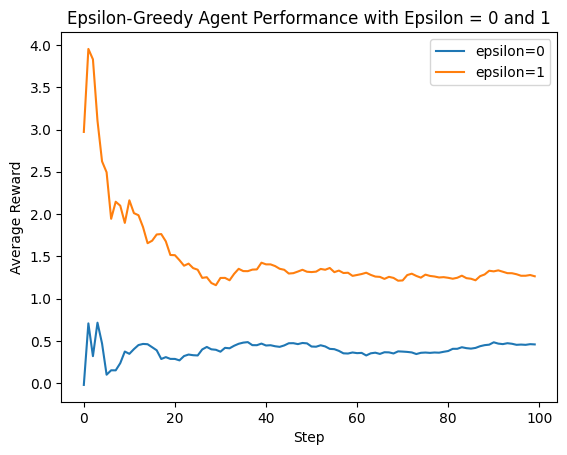

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Test the epsilon-greedy agent with epsilon = 0 and epsilon = 1
epsilon_values = [0, 1]
for epsilon in epsilon_values:
    agent = DecayingEpsilonGreedyAgent(k=env.k, epsilon=epsilon,decay_rate=0.99)
    rewards = []
    for _ in range(100):
        action = agent.select_action()
        _, reward, _, _ = env.step(action)
        agent.update_estimates(action, reward)
        rewards.append(reward)

    # Plot rewards for the current epsilon value
    plt.plot(np.cumsum(rewards) / (np.arange(len(rewards)) + 1), label=f"epsilon={epsilon}")

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Agent Performance with Epsilon = 0 and 1')
plt.legend()
plt.show()


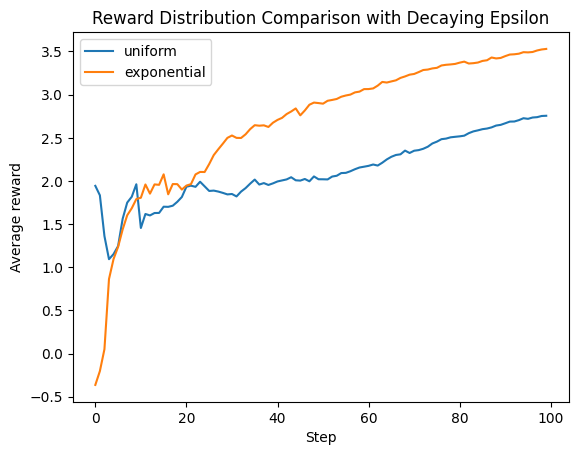

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Modify the reward generation process to a uniform distribution
def test_reward_distribution(distribution_name, num_steps=100):
    if distribution_name == "uniform":
        # Uniform distribution between -5 and 5
        env.q_values = np.random.uniform(-5, 5, env.k)
    elif distribution_name == "exponential":
        # Exponential distribution with scale = 2
        env.q_values = np.random.exponential(scale=2, size=env.k)
    else:
        print("Unknown reward distribution.")
        return

    agent = DecayingEpsilonGreedyAgent(k=env.k, epsilon=0.1, decay_rate=0.99) # Use decaying epsilon
    rewards = []
    for _ in range(num_steps):
        action = agent.select_action()
        _, reward, _, _ = env.step(action)
        agent.update_estimates(action, reward)
        agent.decay_epsilon()
        rewards.append(reward)

    plt.plot(np.cumsum(rewards)/(np.arange(len(rewards))+1), label=distribution_name)
    plt.xlabel('Step')
    plt.ylabel('Average reward')
    plt.title('Reward Distribution Comparison with Decaying Epsilon')

test_reward_distribution("uniform")
test_reward_distribution("exponential")

plt.legend()
plt.show()


### Reflection
- What trends do you observe in the agent's performance as `epsilon` decays over time?
- How does decaying `epsilon` balance exploration and exploitation in comparison to fixed `epsilon` values?
- How might assumptions about the reward distribution affect these results?


As epsilon decays over time, the agent shifts from exploring randomly to relying more on its learned Q-values for decision-making. Initially, a high epsilon encourages frequent random actions, helping the agent gather information about different choices. As epsilon decreases, the agent increasingly favors actions that have yielded higher rewards in the past. This balance between exploration and exploitation allows it to refine its understanding of the best actions while still maintaining some exploration. Performance trends typically show early fluctuations as the agent explores, followed by more stable and increasing rewards as it learns. If epsilon decays too quickly, the agent may settle on a suboptimal action too soon. If it decays too slowly, unnecessary exploration can continue even after the best actions are known. A decaying epsilon is generally more effective than a fixed one, as it adapts the balance over time—ensuring sufficient exploration early on and prioritizing exploitation later. However, assumptions about reward distribution still impact performance; if rewards are not normally distributed, Q-value estimates may be inaccurate, affecting the agent’s ability to make optimal decisions.

Decaying epsilon gradually reduces exploration over time, leading to a more balanced approach.
Initially, high exploration helps discover potentially rewarding actions.
As epsilon decreases, exploitation of learned knowledge becomes dominant, improving performance.
In contrast, fixed epsilon might over-explore or under-explore, hindering optimal learning.
Assumptions about reward distribution still matter, inaccurate assumptions can lead to suboptimal Q-value estimates.


Assumptions about the reward distribution significantly affect the results,
regardless of whether epsilon is fixed or decaying.  The core issue is that
the Q-value updates rely on the observed rewards to estimate the true value
of each action.  If the reward distribution is misrepresented, these estimates
will be inaccurate.


### Final Reflection Question
- Summarize the strengths and weaknesses of the greedy, epsilon-greedy, and decaying epsilon-greedy strategies.
- In which scenarios would each of these strategies be most appropriate?
- How do assumptions about the reward distribution affect the applicability of these strategies?


### Answer

**1. Greedy Strategy**

* **Strengths:**  Simple to implement, computationally efficient, converges quickly.  Optimal in stationary environments where the reward structure doesn't change.
* **Weaknesses:** Prone to getting stuck in local optima.  Highly susceptible to initial estimates.  Performs poorly in dynamic environments where optimal actions change over time (exploitation bias).  No exploration.
* **Appropriate Scenarios:**  Environments with unchanging reward structures, where the initial estimates are highly reliable, or when computational resources are extremely limited.  Problems where exploration is not needed or undesirable (e.g., when the optimal solution is already known, or the cost of exploration is too high).

**2. Epsilon-Greedy Strategy**

* **Strengths:**  Balances exploration and exploitation.  Provides a degree of robustness to inaccurate initial estimates and changing environments. Simple to implement.
* **Weaknesses:**  The fixed epsilon value may not be optimal.  Too high an epsilon leads to excessive random exploration, hindering performance. Too low an epsilon can lead to premature convergence to a suboptimal action.  The exploration rate remains constant, regardless of the agent’s knowledge of the environment.
* **Appropriate Scenarios:** Environments with relatively stable reward structures but where some degree of exploration is needed to account for potential changes or to avoid getting trapped in local optima.  Suitable when the optimal epsilon value can be reasonably estimated or tuned for the given problem.

**3. Decaying Epsilon-Greedy Strategy**

* **Strengths:** Adapts the exploration-exploitation balance over time. Starts with more exploration to learn the environment, then shifts to exploitation as knowledge increases.  More robust than fixed epsilon in dynamic or initially unknown environments.
* **Weaknesses:**  Choosing the initial epsilon and the decay rate can be challenging.  A poorly chosen decay rate can lead to premature convergence to a suboptimal action, or to continued, unnecessary exploration. Still relies on assumptions about the reward distribution.
* **Appropriate Scenarios:** Dynamic environments where the optimal action may change over time, or when the initial reward distribution is unknown. Problems where initial exploration is critical to discover good actions but should be gradually reduced to maximize long-term performance.  Good for complex environments where finding the optimal balance of exploration and exploitation is essential.


**Impact of Reward Distribution Assumptions**

All three strategies assume something about the reward distribution when updating Q-values.  If the actual reward distribution significantly differs from the assumed distribution, the Q-value estimates will be biased, leading to suboptimal performance.  For example, if the rewards are not normally distributed, the estimated Q-values will be affected by outliers in a way that is not adequately accounted for by using the normal distribution assumption. Using more sophisticated update rules or modeling the reward distribution more accurately would make the agents more robust to violations of these assumptions.

The assumptions about reward distribution greatly impact strategy effectiveness. In stable environments, where rewards don’t change, all three strategies work well, with the greedy strategy being the simplest if the best action is known. In changing environments, the greedy strategy struggles because it can't adapt. The epsilon-greedy strategy does better by exploring, though its fixed rate may not be ideal. The decaying epsilon-greedy strategy adapts best by adjusting exploration over time. The shape of the reward distribution also matters—while all strategies work for normal distributions, exploration is more crucial in skewed ones. If the assumed distribution is wrong, performance may decline, emphasizing the need to match strategy to the environment.
